In [11]:
import torch
import numpy as np

from data import Data, Interval
from model import FCNet
from solver import FunctionApproximator
from plotting import BasePlotter

device = torch.device('cpu')

Function to approximate

$y(x) = x^2$

In [12]:
def func(x):
    return torch.sin(x)

In [24]:
features_in = 1
features_out = 1
hidden = [3]

model = FCNet(features_in, hidden, features_out, activation='relu', init_weights=False)

domain = Interval(-np.pi, np.pi, steps=1000)
data = Data(domain, solution=func)

solver = FunctionApproximator(model, data, device=device)
solver.compile('adam', lr=1e-2)
losses = solver.train(num_epochs=2000, atol=1e-3, save_gif=True)
solver.create_gif(gif_save_path='gif_test4')

Training Progress: 100%|████████████████████████| 2000/2000 [00:11<00:00, 172.84it/s, Loss: 0.00529232 | LR: 0.01000000]


GIF saved at gif_test4/relu_3.gif


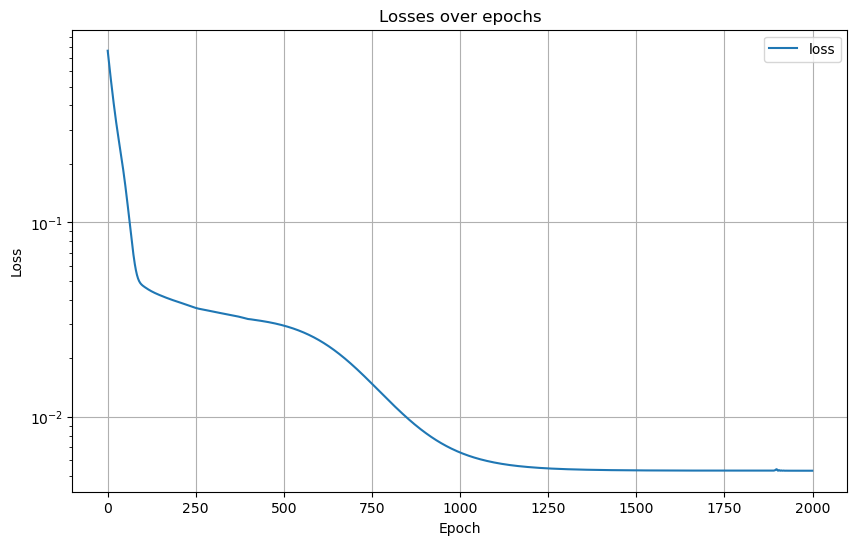

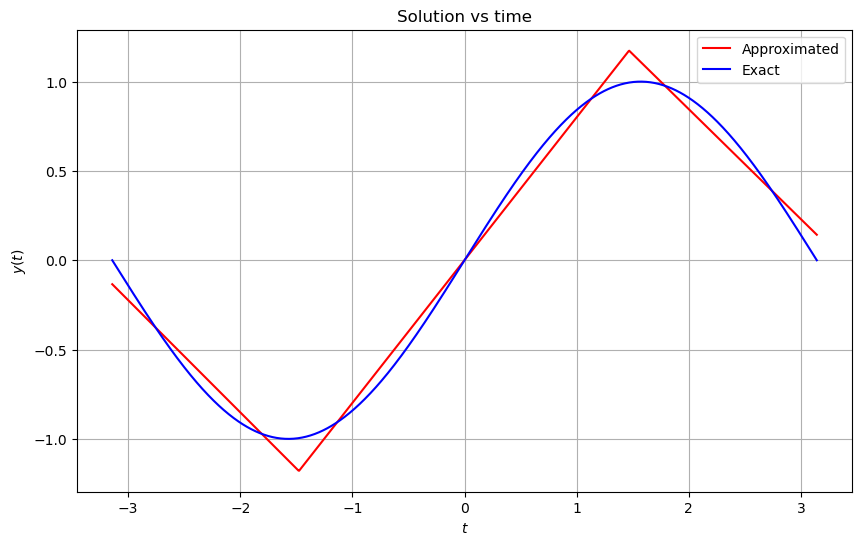

In [25]:
plot = BasePlotter(solver)
plot.losses(losses)
plot.numerical_solution()

In [15]:
solver.evaluate(value=0.0)

Model parameter count: 10
--- At t = 0.0000 ---
Solution | Computed: 0.1156, Exact: 0.0000, Abs Error: 0.1156

